In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
current_dir = (os.getcwd())
current_dir

In [ ]:
source_dir = './Source/'
target_dir = './Cropped/'

In [ ]:
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

In [ ]:
def crop_image(source):
    # Load image
    img = cv2.imread(source)

    # Apply Gaussian blur to smooth the image
    blurred = cv2.GaussianBlur(img, (5, 5), 0)

    # Apply Canny edge detection to find edges
    edges = cv2.Canny(blurred, 200, 255)

    # Find contours in the edge image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the largest contour (assuming it's the object)
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding box of the contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    print(x, y, w, h)

    # Extract the region of interest
    roi = img[x:x+w, y:y+h]

    # Get the shape of the ROI
    roi_shape = roi.shape[:2]

    # Create bounding box around the object
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Crop the image to the bounding box and resize to 224x224
    cropped = cv2.resize(img[y:y+h, x:x+w], roi_shape)

    # Save the cropped image
    # cv2.imwrite(target, cropped)

    return img, blurred, edges, cropped

In [ ]:
classes = os.listdir(source_dir)
for single_class in classes:
    filenames = os.listdir(os.path.join(source_dir, single_class))
    for filename in filenames:
        file_dir = os.path.join(source_dir, single_class, filename)
        img, blurred, edges, cropped = crop_image(file_dir)

        # Display original and cropped images side by side
        fig, axs = plt.subplots(1, 4, figsize=(25, 10))
        axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axs[0].set_title('Original Image')
        axs[1].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
        axs[1].set_title('Blurred Image')
        axs[2].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
        axs[2].set_title('Edges')
        axs[3].imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
        axs[3].set_title('Cropped Object')
        plt.show()

37 71 139 144


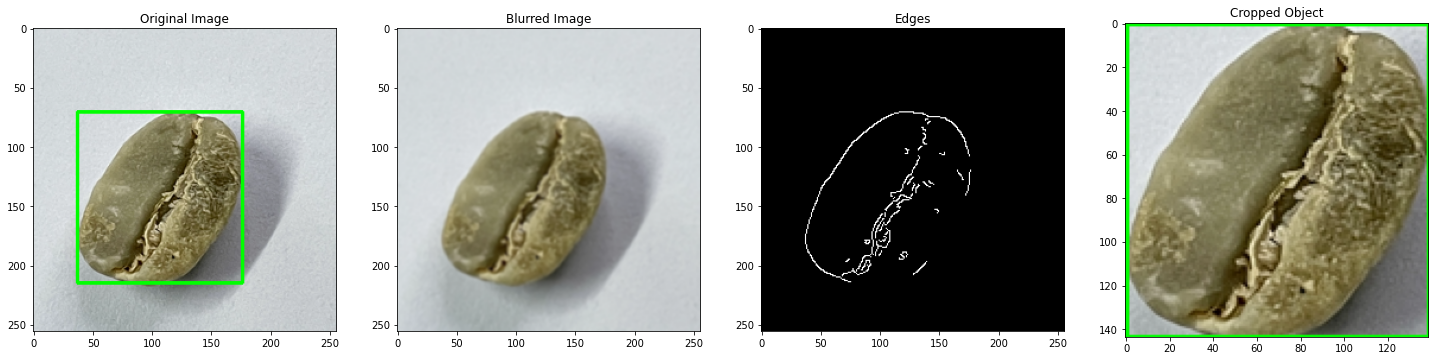

In [20]:
file_image = 'Source/Green/green (3).png'
img, blurred, edges, cropped = crop_image(file_image)

# Display original and cropped images side by side
fig, axs = plt.subplots(1, 4, figsize=(25, 10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
axs[1].set_title('Blurred Image')
axs[2].imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
axs[2].set_title('Edges')
axs[3].imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
axs[3].set_title('Cropped Object')
plt.show()